<a href="https://colab.research.google.com/github/HarshaLLabade/My_Projects/blob/main/4C_Auto_Insurance_Claims_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("https://raw.githubusercontent.com/HarshaLLabade/ICT/main/Data%20sets/insurance_claims.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [ ]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [ ]:
lst_1=[]
for i in range(len(df.columns)):
  x=df.columns[i]
  if df[x].dtype=='object':
    lst_1.append(x)

lst_1

['policy_bind_date',
 'policy_state',
 'policy_csl',
 'insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_hobbies',
 'insured_relationship',
 'incident_date',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'incident_state',
 'incident_city',
 'incident_location',
 'property_damage',
 'police_report_available',
 'auto_make',
 'auto_model',
 'fraud_reported']

In [ ]:
for i in range(len(lst_1)):
  x=lst_1[i]
  print(df[x].value_counts())

2006-01-01    3
1992-04-28    3
1992-08-05    3
1991-12-14    2
2004-08-09    2
             ..
2014-06-03    1
1998-12-12    1
1999-02-18    1
1997-10-30    1
1996-11-11    1
Name: policy_bind_date, Length: 951, dtype: int64
OH    352
IL    338
IN    310
Name: policy_state, dtype: int64
250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64
FEMALE    537
MALE      463
Name: insured_sex, dtype: int64
JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64
machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64
reading           64

In [ ]:
lst=[]
for i in range(len(df.columns)):
  x=df.columns[i]
  if df[x].dtype=='int64':
    lst.append(x)

lst

['months_as_customer',
 'age',
 'policy_number',
 'policy_deductable',
 'umbrella_limit',
 'insured_zip',
 'capital-gains',
 'capital-loss',
 'incident_hour_of_the_day',
 'number_of_vehicles_involved',
 'bodily_injuries',
 'witnesses',
 'total_claim_amount',
 'injury_claim',
 'property_claim',
 'vehicle_claim',
 'auto_year']

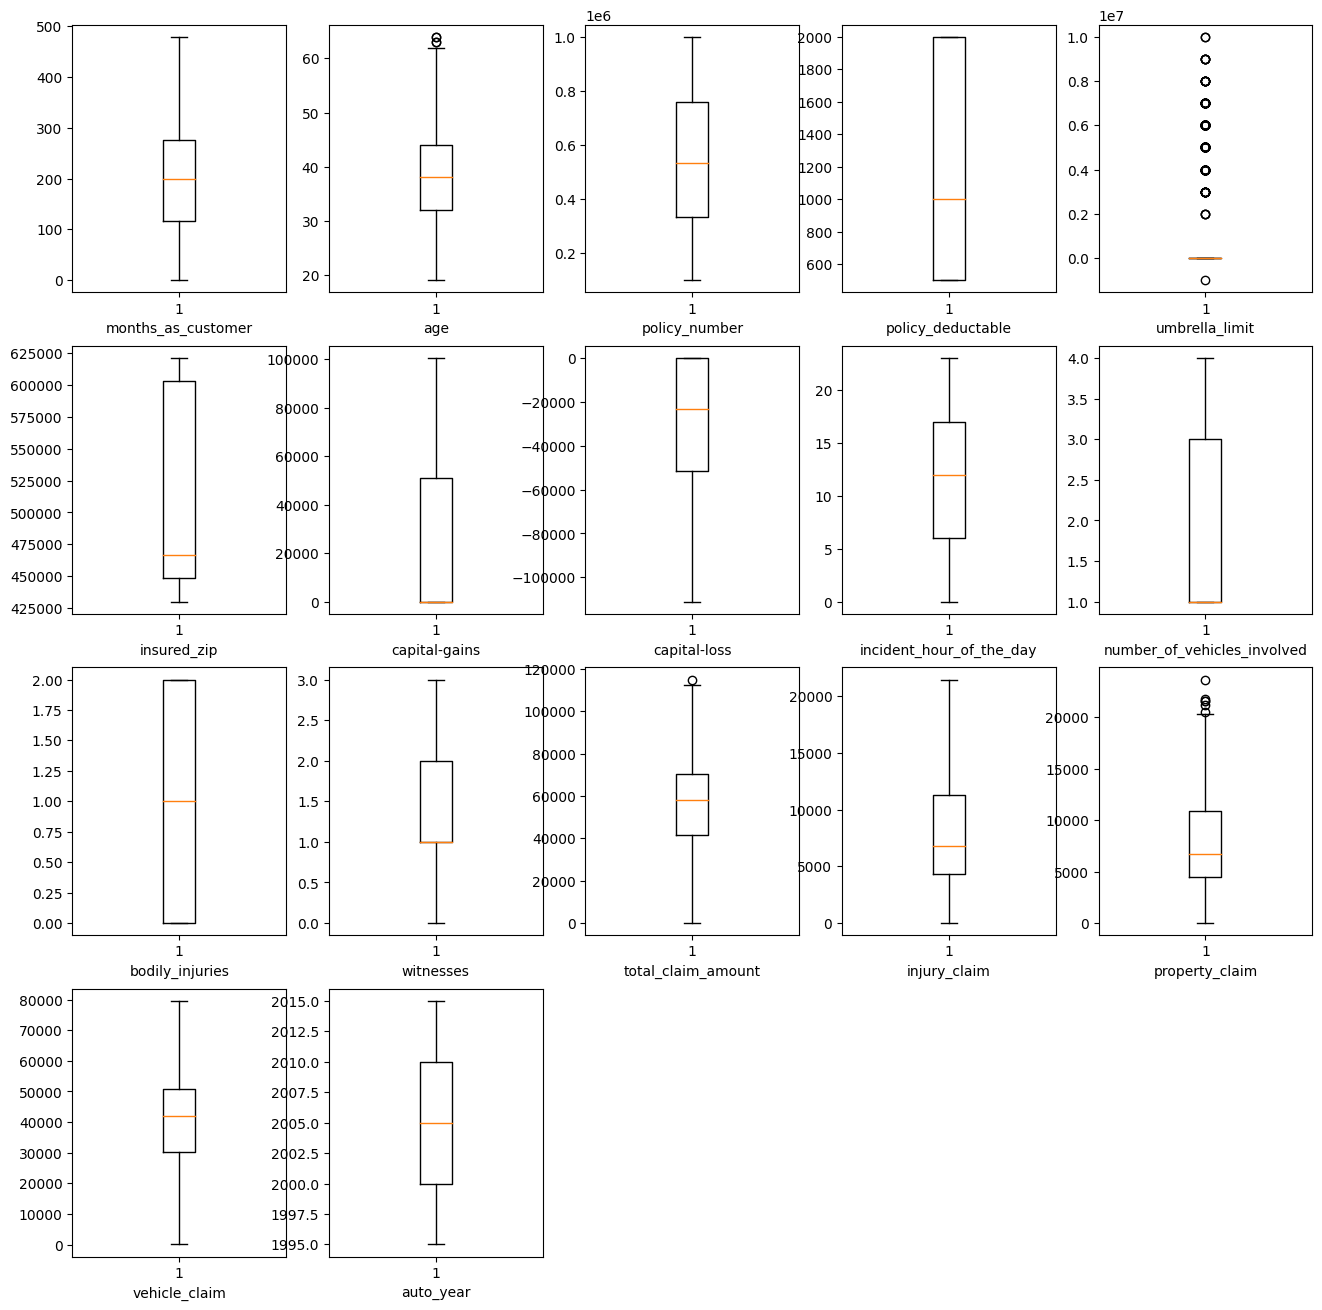

In [ ]:
plt.figure(figsize=[16,16])
for i in range(len(lst)):
  x=lst[i]
  plt.subplot(4,5,i+1)
  plt.xlabel(x)
  plt.boxplot(df[x])

In [ ]:
for i in range(len(lst)):
  x=lst[i]
  print(df[x].value_counts())

194    8
128    7
254    7
140    7
210    7
      ..
390    1
411    1
453    1
448    1
17     1
Name: months_as_customer, Length: 391, dtype: int64
43    49
39    48
41    45
34    44
38    42
30    42
31    42
37    41
33    39
40    38
32    38
29    35
46    33
42    32
35    32
36    32
44    32
28    30
26    26
45    26
48    25
47    24
27    24
57    16
25    14
55    14
49    14
53    13
50    13
24    10
54    10
61    10
51     9
60     9
58     8
56     8
23     7
21     6
59     5
62     4
52     4
64     2
63     2
19     1
20     1
22     1
Name: age, dtype: int64
521585    1
687755    1
674485    1
223404    1
991480    1
         ..
563878    1
620855    1
583169    1
337677    1
556080    1
Name: policy_number, Length: 1000, dtype: int64
1000    351
500     342
2000    307
Name: policy_deductable, dtype: int64
 0           798
 6000000      57
 5000000      46
 4000000      39
 7000000      29
 3000000      12
 8000000       8
 9000000       5
 2000000       3
 100

In [ ]:
df["property_damage"].value_counts()

?      360
NO     338
YES    302
Name: property_damage, dtype: int64

In [ ]:
df["police_report_available"].value_counts()

?      343
NO     343
YES    314
Name: police_report_available, dtype: int64

In [ ]:
df["collision_type"].value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64

In [ ]:
#df["umbrella_limit"].value_counts()
#df["umbrella_limit"].describe()
print(df["umbrella_limit"].value_counts(),round(df["umbrella_limit"].describe()))

 0           798
 6000000      57
 5000000      46
 4000000      39
 7000000      29
 3000000      12
 8000000       8
 9000000       5
 2000000       3
 10000000      2
-1000000       1
Name: umbrella_limit, dtype: int64 count        1000.0
mean      1101000.0
std       2297407.0
min      -1000000.0
25%             0.0
50%             0.0
75%             0.0
max      10000000.0
Name: umbrella_limit, dtype: float64


In [ ]:
df=df.drop(["_c39"],axis=1)
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

{'whiskers': [<matplotlib.lines.Line2D at 0x7fece0011120>,
 'caps': [<matplotlib.lines.Line2D at 0x7fece0011660>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fece0010e80>],
 'medians': [<matplotlib.lines.Line2D at 0x7fece0011ba0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fece0011e40>],
 'means': []}

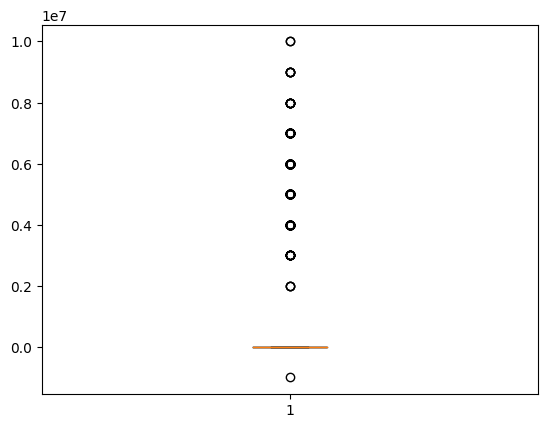

In [ ]:
plt.boxplot(df["umbrella_limit"])

In [ ]:
df["umbrella_limit"].quantile([0,0.71,0.72,0.73,0.74,0.75,0.76,0.77,0.78,0.79,0.8,0.81,0.82,0.83,0.84,0.85,0.86,0.87,0.88,0.89,1])

0.00    -1000000.0
0.71           0.0
0.72           0.0
0.73           0.0
0.74           0.0
0.75           0.0
0.76           0.0
0.77           0.0
0.78           0.0
0.79           0.0
0.80     2000000.0
0.81     3000000.0
0.82     4000000.0
0.83     4000000.0
0.84     4000000.0
0.85     4000000.0
0.86     5000000.0
0.87     5000000.0
0.88     5000000.0
0.89     5000000.0
1.00    10000000.0
Name: umbrella_limit, dtype: float64

In [ ]:
d_1=pd.crosstab(df["collision_type"],df["fraud_reported"])
d_1.astype(float).div(d_1.sum(axis=1),axis=0)

fraud_reported,N,Y
collision_type,,
?,0.910112,0.089888
Front Collision,0.724409,0.275591
Rear Collision,0.688356,0.311644
Side Collision,0.746377,0.253623


In [ ]:
d_2=pd.crosstab(df["police_report_available"],df["fraud_reported"])
d_2.astype(float).div(d_2.sum(axis=1),axis=0)

fraud_reported,N,Y
police_report_available,,
?,0.740525,0.259475
NO,0.749271,0.250729
YES,0.770701,0.229299


In [ ]:
df['collision_type']=df['collision_type'].map({"Front Collision":0,"Rear Collision":1,"Side Collision":2})

In [ ]:
(df['collision_type'].isnull().sum())/len(df)

0.178

In [ ]:
df['collision_type'].value_counts()

1.0    292
2.0    276
0.0    254
Name: collision_type, dtype: int64

In [ ]:
for i,data in df.iterrows():
  if pd.isnull(data['collision_type']):
    df.at[i,'collision_type']=np.random.randint(0,3)
    #print(i," " ,df.at[i,'Age'])

In [ ]:
d_1=pd.crosstab(df["collision_type"],df["fraud_reported"])
d_1.astype(float).div(d_1.sum(axis=1),axis=0)

fraud_reported,N,Y
collision_type,,
0.0,0.760252,0.239748
1.0,0.724138,0.275862
2.0,0.776119,0.223881


In [ ]:
d_3=pd.crosstab(df["property_damage"],df["fraud_reported"])
d_3.astype(float).div(d_3.sum(axis=1),axis=0)

fraud_reported,N,Y
property_damage,,
?,0.713889,0.286111
NO,0.804734,0.195266
YES,0.741722,0.258278


In [ ]:
mask=df["police_report_available"]=="?"
(df["police_report_available"][mask].value_counts())/len(df)

?    0.343
Name: police_report_available, dtype: float64

In [ ]:
df['police_report_available'].value_counts()
d_2=pd.crosstab(df["police_report_available"],df["fraud_reported"])
d_2.astype(float).div(d_2.sum(axis=1),axis=0)

fraud_reported,N,Y
police_report_available,,
NO,0.744898,0.255102
YES,0.770701,0.229299


In [ ]:
df['property_damage']=df['property_damage'].map({"YES":1,"NO":0})

In [ ]:
mask=df['property_damage'].isnull()
df['property_damage'][mask] = 0     # Mode and Median value is 0

<ipython-input-49-1336f932ea94>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['property_damage'][mask] = 0     # Mode and Median value is 0


In [ ]:
d_3=pd.crosstab(df["property_damage"],df["fraud_reported"])
d_3.astype(float).div(d_3.sum(axis=1),axis=0)

fraud_reported,N,Y
property_damage,,
0.0,0.757880,0.242120
1.0,0.741722,0.258278


In [ ]:
mask=df['umbrella_limit'] < 0
df[mask]

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
290,284,42,526039,1995-05-04,OH,100/300,500,1338.54,-1000000,438178,...,1,NO,94160,8560,17120,68480,Chevrolet,Malibu,1996,N


In [ ]:
df.drop(df.index[290],inplace=True)

In [ ]:
df.shape

(999, 37)

In [ ]:
8560+17120+68480

94160

<ipython-input-53-749688f31fbe>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  x=df.corr()


<Axes: >

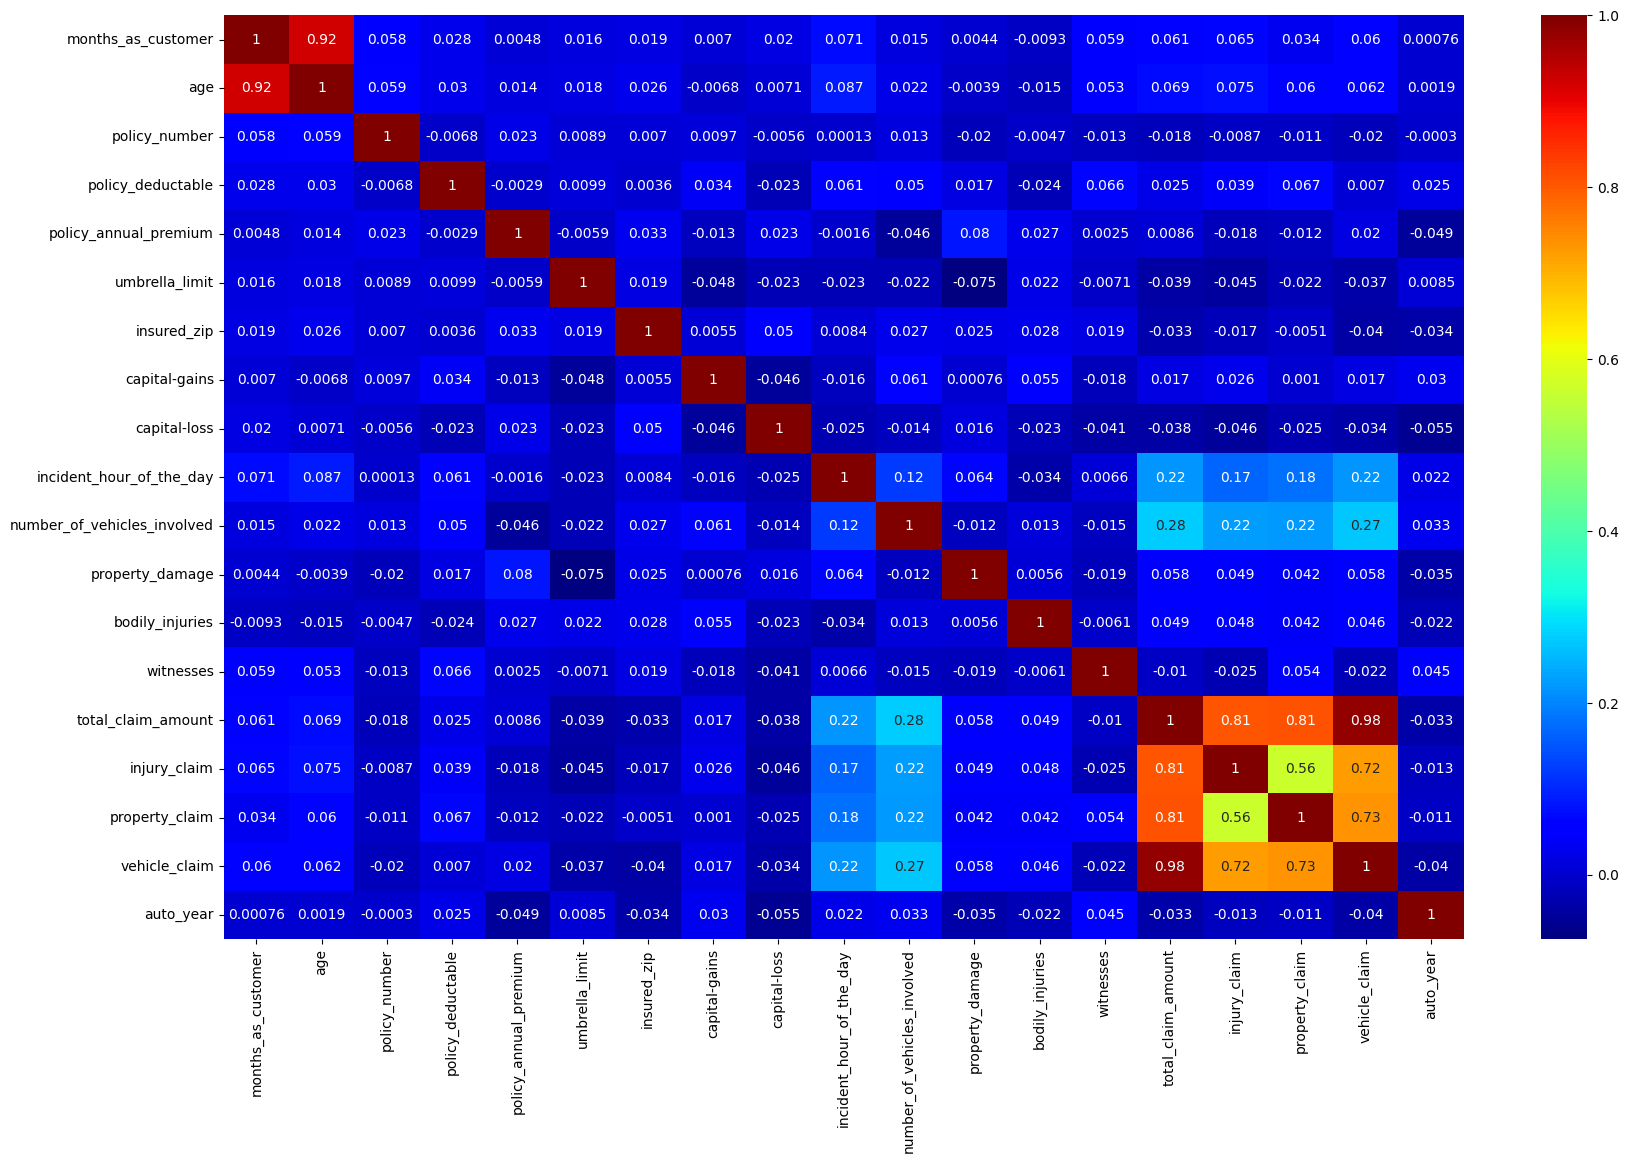

In [ ]:
plt.figure(figsize=[20,12])
x=df.corr()
sns.heatmap(x,annot=True,cmap="jet")

In [ ]:
df=df.drop(['age','total_claim_amount'],axis=1)

<ipython-input-55-749688f31fbe>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  x=df.corr()


<Axes: >

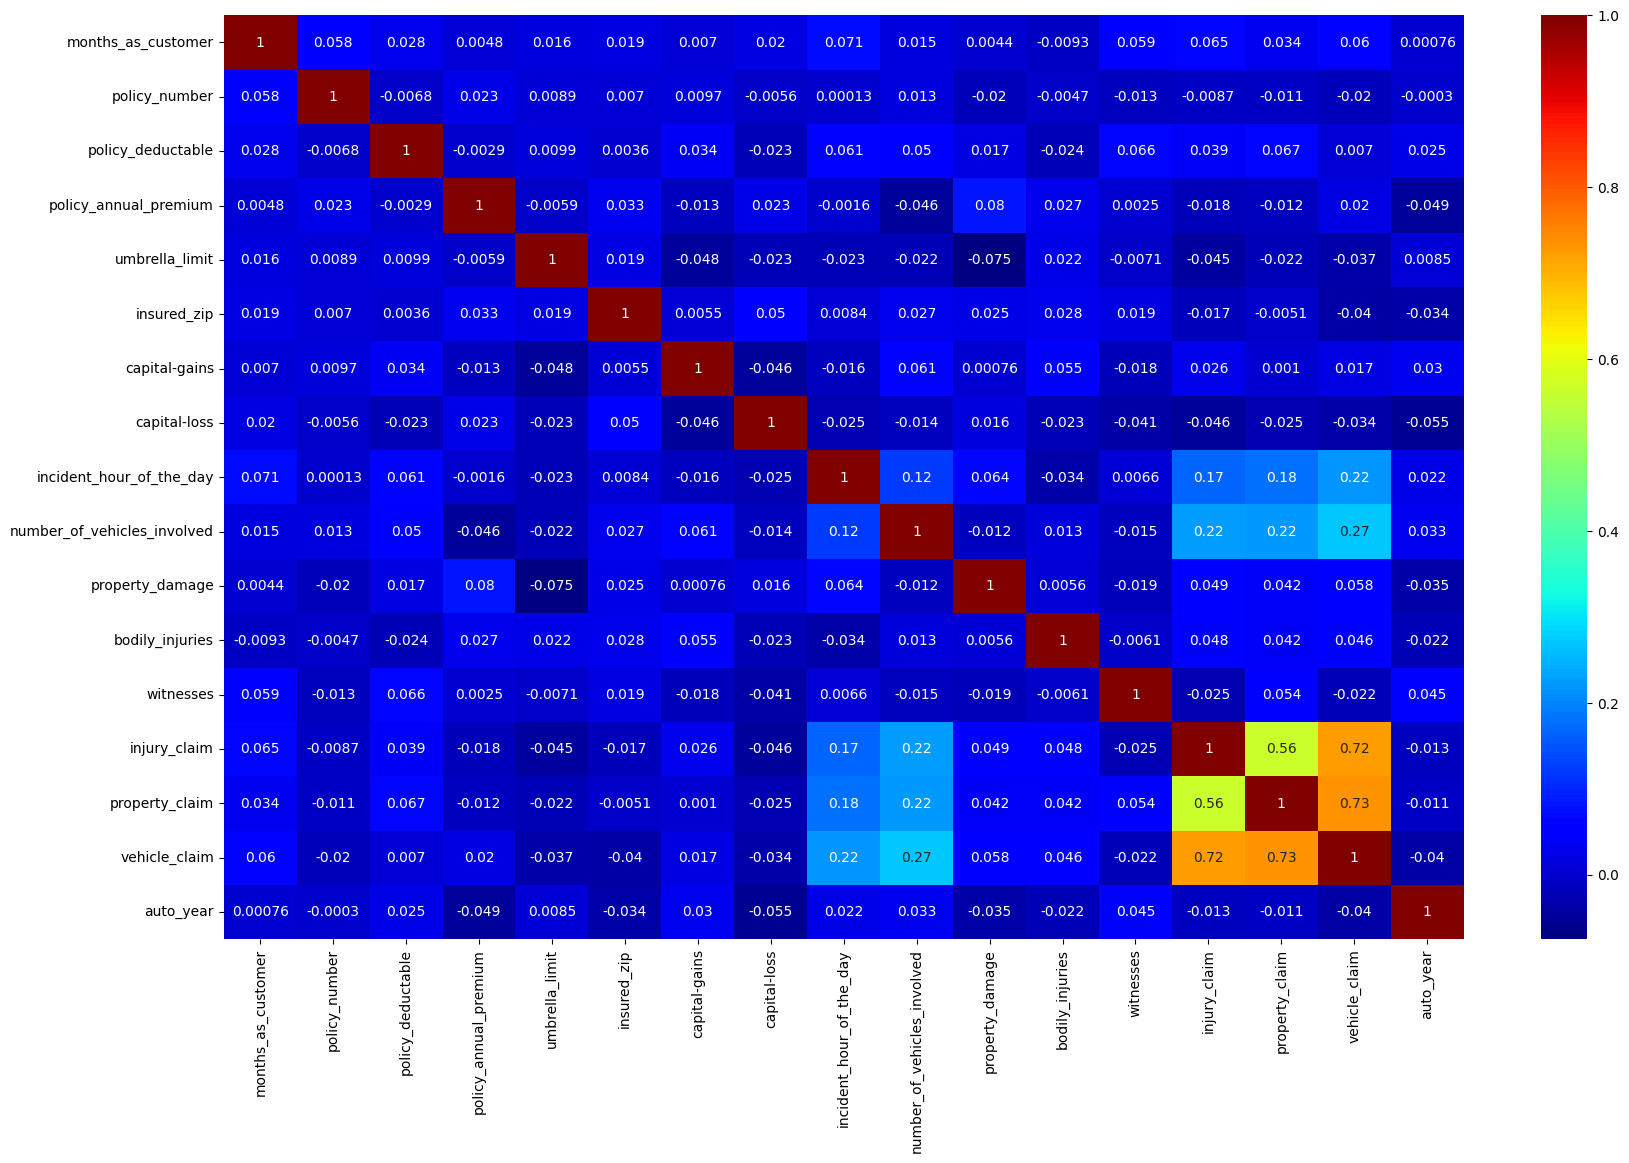

In [ ]:
plt.figure(figsize=[20,12])
x=df.corr()
sns.heatmap(x,annot=True,cmap="jet")

In [ ]:
df.head(5)

,months_as_customer,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,...,1,2,YES,6510,13020,52080,Saab,92x,2004,Y
1,228,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,...,0,0,NO,780,780,3510,Mercedes,E400,2007,Y
2,134,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,2,3,NO,7700,3850,23100,Dodge,RAM,2007,N
3,256,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,1,2,NO,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,0,1,NO,1300,650,4550,Accura,RSX,2009,N


In [ ]:
print(df['property_claim'].describe(),"\n",df['property_claim'].value_counts())

count      999.000000
mean      7389.839840
std       4817.316312
min          0.000000
25%       4440.000000
50%       6750.000000
75%      10870.000000
max      23670.000000
Name: property_claim, dtype: float64 
 0        19
860       6
660       5
11080     5
650       5
         ..
6170      1
3590      1
6480      1
4580      1
7500      1
Name: property_claim, Length: 625, dtype: int64


In [ ]:
df['property_claim'].median()

6750.0

In [ ]:
#df['property_claim'].quantile([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
df['property_claim'].quantile([0,0.991,0.992,0.993,0.994,0.995,0.996,0.997,0.998,0.999,1])

0.000        0.00
0.991    19655.40
0.992    19955.28
0.993    20280.42
0.994    20312.88
0.995    20556.90
0.996    21242.72
0.997    21580.30
0.998    21630.72
0.999    21813.72
1.000    23670.00
Name: property_claim, dtype: float64

In [ ]:
mask=df['property_claim'] > 20000
df['property_claim'][mask]=df['property_claim'].mean()

<ipython-input-68-e4e6d8024d3c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['property_claim'][mask]=df['property_claim'].mean()


{'whiskers': [<matplotlib.lines.Line2D at 0x7e55fc578f10>,
 'caps': [<matplotlib.lines.Line2D at 0x7e55fc579d20>,
 'boxes': [<matplotlib.lines.Line2D at 0x7e55fc57ba30>],
 'medians': [<matplotlib.lines.Line2D at 0x7e55fc5787f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7e55fc5792a0>],
 'means': []}

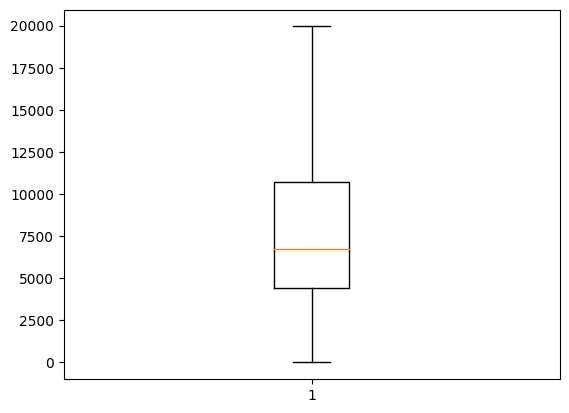

In [ ]:
plt.boxplot(df['property_claim'])

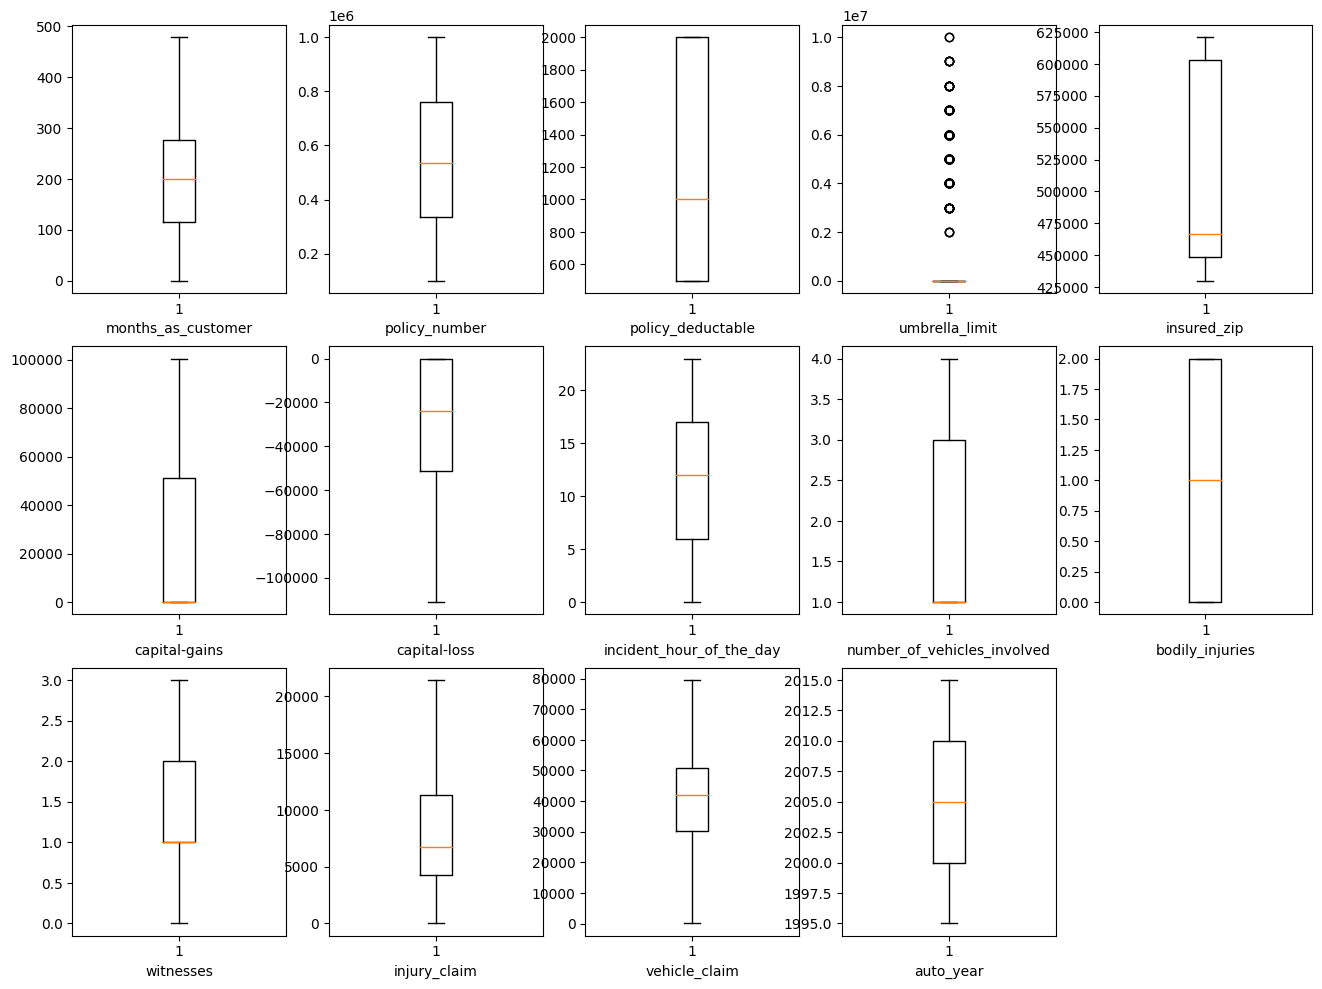

In [ ]:
lst=[]
for i in range(len(df.columns)):
  x=df.columns[i]
  if df[x].dtype=='int64':
    lst.append(x)


plt.figure(figsize=[16,16])
for i in range(len(lst)):
  x=lst[i]
  plt.subplot(4,5,i+1)
  plt.xlabel(x)
  plt.boxplot(df[x])

In [ ]:
lst_1=[]
for i in range(len(df.columns)):
  x=df.columns[i]
  if df[x].dtype=='object':
    lst_1.append(x)
lst_1

In [ ]:
for i in range(len(lst_1)):
  x=lst_1[i]
  print(df[x].value_counts())

In [ ]:
df['policy_csl']=df['policy_csl'].map({"250/500":1,"100/300":2,"500/1000":3})

In [ ]:
df['fraud_reported']=df['fraud_reported'].map({"Y":1,"N":0})

In [ ]:
df['police_report_available']=df['police_report_available'].map({"YES":1,"NO":0})

In [ ]:
df['insured_sex']=df['insured_sex'].map({"MALE":1,"FEMALE":0})

In [ ]:
df.head(5)

,months_as_customer,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,521585,2014-10-17,OH,1,1000,1406.91,0,466132,1,...,1,2,1,6510,13020.0,52080,Saab,92x,2004,NaN
1,228,342868,2006-06-27,IN,1,2000,1197.22,5000000,468176,1,...,0,0,0,780,780.0,3510,Mercedes,E400,2007,NaN
2,134,687698,2000-09-06,OH,2,2000,1413.14,5000000,430632,0,...,2,3,0,7700,3850.0,23100,Dodge,RAM,2007,NaN
3,256,227811,1990-05-25,IL,1,2000,1415.74,6000000,608117,0,...,1,2,0,6340,6340.0,50720,Chevrolet,Tahoe,2014,NaN
4,228,367455,2014-06-06,IL,3,1000,1583.91,6000000,610706,1,...,0,1,0,1300,650.0,4550,Accura,RSX,2009,NaN


In [ ]:
df.iloc[2]

months_as_customer                                 134
policy_number                                   687698
policy_bind_date                            2000-09-06
policy_state                                        OH
policy_csl                                           2
policy_deductable                                 2000
policy_annual_premium                          1413.14
umbrella_limit                                 5000000
insured_zip                                     430632
insured_sex                                          0
insured_education_level                            PhD
insured_occupation                               sales
insured_hobbies                            board-games
insured_relationship                         own-child
capital-gains                                    35100
capital-loss                                         0
incident_date                               2015-02-22
incident_type                  Multi-vehicle Collision
collision_

In [ ]:
df.columns

Index(['months_as_customer', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'injury_claim',
       'property_claim', 'vehicle_claim', 'auto_make', 'auto_model',
       'auto_year', 'fraud_reported'],
      dtype='object')

In [ ]:
to_drop = ['policy_number','policy_bind_date','policy_state','insured_zip','incident_location','incident_date',
           'incident_state','incident_city','insured_hobbies','auto_make','auto_model','auto_year']

In [ ]:
df.drop(to_drop, inplace = True, axis = 1)

In [ ]:
x = df.drop('fraud_reported', axis = 1)
y = df['fraud_reported']

NameError: ignored

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)